<a href="https://colab.research.google.com/github/bilal3776/Analytics/blob/master/Dogs_vs_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.datasets import make_regression, make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Nadam

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 281MB/s]
100% 1.06G/1.06G [00:04<00:00, 257MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
#generators - it will create multiple batches and helps in saving RAM

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
    )
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#Normalise
import tensorflow as tf
def process(image, label):
  image=tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(256,256,3), padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 105ms/step - loss: 0.6278 - accuracy: 0.6521 - val_loss: 0.5306 - val_accuracy: 0.7304
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4701 - accuracy: 0.7746 - val_loss: 0.4517 - val_accuracy: 0.7850
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3649 - accuracy: 0.8372 - val_loss: 0.4363 - val_accuracy: 0.8070
Epoch 4/10
625/625 [==============================] - 58s 91ms/step - loss: 0.2385 - accuracy: 0.8993 - val_loss: 0.7648 - val_accuracy: 0.7822
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1312 - accuracy: 0.9478 - val_loss: 0.8703 - val_accuracy: 0.7958
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0827 - accuracy: 0.9705 - val_loss: 1.0510 - val_accuracy: 0.7872
Epoch 7/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0560 - accuracy: 0.9807 - val_loss: 1.3303 - val_accura

[]

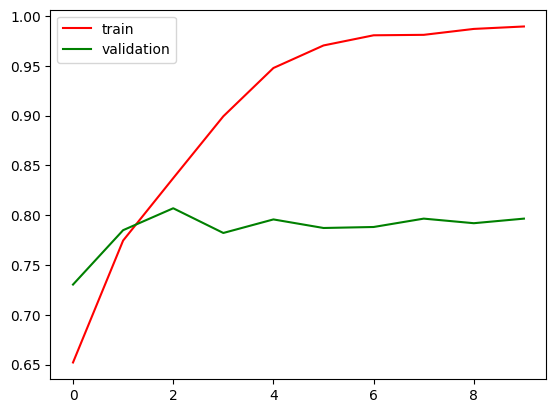

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.plot()

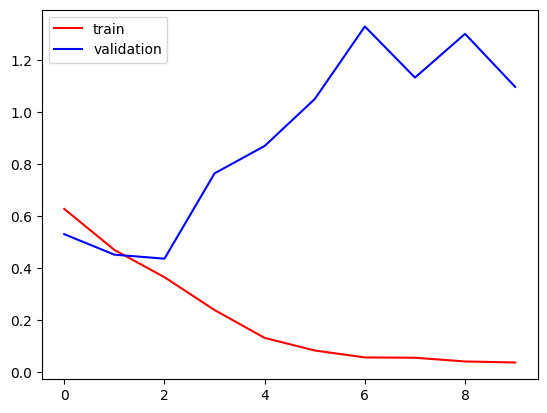

In [20]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [21]:
#as we can see our model is overfitting
# methods for reducing overfitting
# 1 add more data
#2 data augmentation
#3 L1/L2 regularizer
# dropouts
# batch norm
# reduce complexity

In [24]:
#creating that model again to improve accuracy
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(255,255,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=2, pool_size=(2,2), padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=2, pool_size=(2,2), padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 253, 253, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                      

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
#need to check on this error

Epoch 1/10


ValueError: ignored